In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from keras.preprocessing.image import ImageDataGenerator
import keras
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
import os
import shutil

In [7]:
Pdirectory = '/content/drive/My Drive/Picture/Poisonous'
Edirectory = '/content/drive/My Drive/Picture/Eatable'
prefix = 'Poisonous'
Eprefix = 'Edible'

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [ ]:
files = os.listdir(Pdirectory)

In [ ]:
for file in files:
   # Construct the file path
        file_path = os.path.join(Pdirectory, file)

        # Load the image using PIL
        img = load_img(file_path)

        # Convert the image to a NumPy array
        x = img_to_array(img)

        # Reshape the array to have an additional dimension of size 1 at the beginning
        x = x.reshape((1,) + x.shape)

        # Use the datagen.flow() method to generate augmented images and save them to the 'preview' directory
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir='/content/drive/My Drive/Picture/TranPoisonous', save_prefix=prefix, save_format='jpeg'):
            i += 1
            if i > 20:
                break

In [ ]:
Efiles = os.listdir(Edirectory)

In [ ]:
for file in Efiles:
   # Construct the file path
        file_path = os.path.join(Edirectory, file)

        # Load the image using PIL
        img = load_img(file_path)

        # Convert the image to a NumPy array
        x = img_to_array(img)

        # Reshape the array to have an additional dimension of size 1 at the beginning
        x = x.reshape((1,) + x.shape)

        # Use the datagen.flow() method to generate augmented images and save them to the 'preview' directory
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir='/content/drive/My Drive/Picture/TranEdible', save_prefix=Eprefix, save_format='jpeg'):
            i += 1
            if i > 20:
                break

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Poriginal_dir = '/content/drive/My Drive/Picture/TranPoisonous'
Eoriginal_dir = '/content/drive/My Drive/Picture/TranEdible'

In [ ]:
Pall_filenames = os.listdir(Poriginal_dir)
Eall_filenames = os.listdir(Eoriginal_dir)

In [ ]:
Ptrain_filenames, Ptest_filenames = train_test_split(Pall_filenames, test_size=0.2, random_state=42)
Etrain_filenames, Etest_filenames = train_test_split(Eall_filenames, test_size=0.2, random_state=42)

In [ ]:
Ptrain_dir = '/content/drive/My Drive/Picture/Train/Poisonous1'
Ptest_dir = '/content/drive/My Drive/Picture/Test/Poisonous'
Etrain_dir = '/content/drive/My Drive/Picture/Train/Edible'
Etest_dir = '/content/drive/My Drive/Picture/Test/Edible'

In [ ]:

for filename in Ptrain_filenames:
    src = os.path.join(Poriginal_dir, filename)
    dst = os.path.join(Ptrain_dir, filename)
    shutil.copy(src, dst)


In [ ]:
    
for filename in Ptest_filenames:
    src = os.path.join(Poriginal_dir, filename)
    dst = os.path.join(Ptest_dir, filename)
    shutil.copy(src, dst)


In [ ]:
for filename in Etrain_filenames:
    src = os.path.join(Eoriginal_dir, filename)
    dst = os.path.join(Etrain_dir, filename)
    shutil.copy(src, dst)


In [ ]:
for filename in Etest_filenames:
    src = os.path.join(Eoriginal_dir, filename)
    dst = os.path.join(Etest_dir, filename)
    shutil.copy(src, dst)

In [ ]:
TrainCount=0
TestCount=0
for filename in Ptrain_filenames:
    TrainCount+=1
for filename in Ptest_filenames:
    TestCount+=1
for filename in Etrain_filenames:
    TrainCount+=1
for filename in Etest_filenames:
    TestCount+=1
print("Test:",TestCount)
print("Train:",TrainCount)

Test: 1122
Train: 4482


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [ ]:
img_width, img_height = 150, 150

train_data_dir = '/content/drive/My Drive/Picture/Train'
test_data_dir = '/content/drive/My Drive/Picture/Test'
nb_train_samples = TrainCount
nb_test_samples = TestCount
#below can change to improve
epochs = 50 # the model will be trained for a total of 50 passes over the entire training dataset.
batch_size = 16 # which means that during each iteration of training, the model will process and update its weights based on 16 samples from the training dataset.

In [ ]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 4482 images belonging to 2 classes.
Found 1122 images belonging to 2 classes.


In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=nb_test_samples // batch_size)

<ipython-input-20-6b9396a102e3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/50
  1/280 [..............................] - ETA: 1:00:01 - loss: 0.6645 - accuracy: 0.7500

In [ ]:
model.save_weights('first_try.h5')

In [ ]:
from keras.layers import Dense


In [ ]:
# Load the saved model
loaded_model = Sequential()
loaded_model.add(Dense(units=64, activation='relu', input_dim=100))
loaded_model.add(Dense(units=10, activation='softmax'))
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load the weights into the loaded_model
loaded_model.load_weights('first_try.h5', by_name=True)


In [ ]:
# Load the saved model weights
model.load_weights('first_try.h5')

# Compile the model with the same parameters as used during training
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Evaluate the model on test data
score =model.evaluate(test_generator, steps=(nb_test_samples // batch_size))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

70/70 [==============================] - 33s 464ms/step - loss: 0.0000e+00 - accuracy: 0.8473
Test loss: 0.0
Test accuracy: 0.8473214507102966


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [ ]:
ft=pd.read_excel('/content/drive/My Drive/firstModelPreformance.xlsx', sheet_name = 'Sheet1')
ft.head()

,Epoch,loss,accuracy,val_loss,val_accuracy
0,1,0.6794,0.5710,0.6249,0.6750
1,2,0.6535,0.6270,0.6065,0.6866
2,3,0.6324,0.6545,0.5884,0.7018
3,4,0.5931,0.6935,0.5873,0.6777
4,5,0.5634,0.7223,0.5768,0.7054


In [ ]:
ls = pd.DataFrame(ft['loss'])
ac = pd.DataFrame(ft['accuracy'])
vl = pd.DataFrame(ft['val_loss'])
va = pd.DataFrame(ft['val_accuracy'])
al = pd.DataFrame(ft[['loss','accuracy','val_loss','val_accuracy']])

AttributeError: ignored

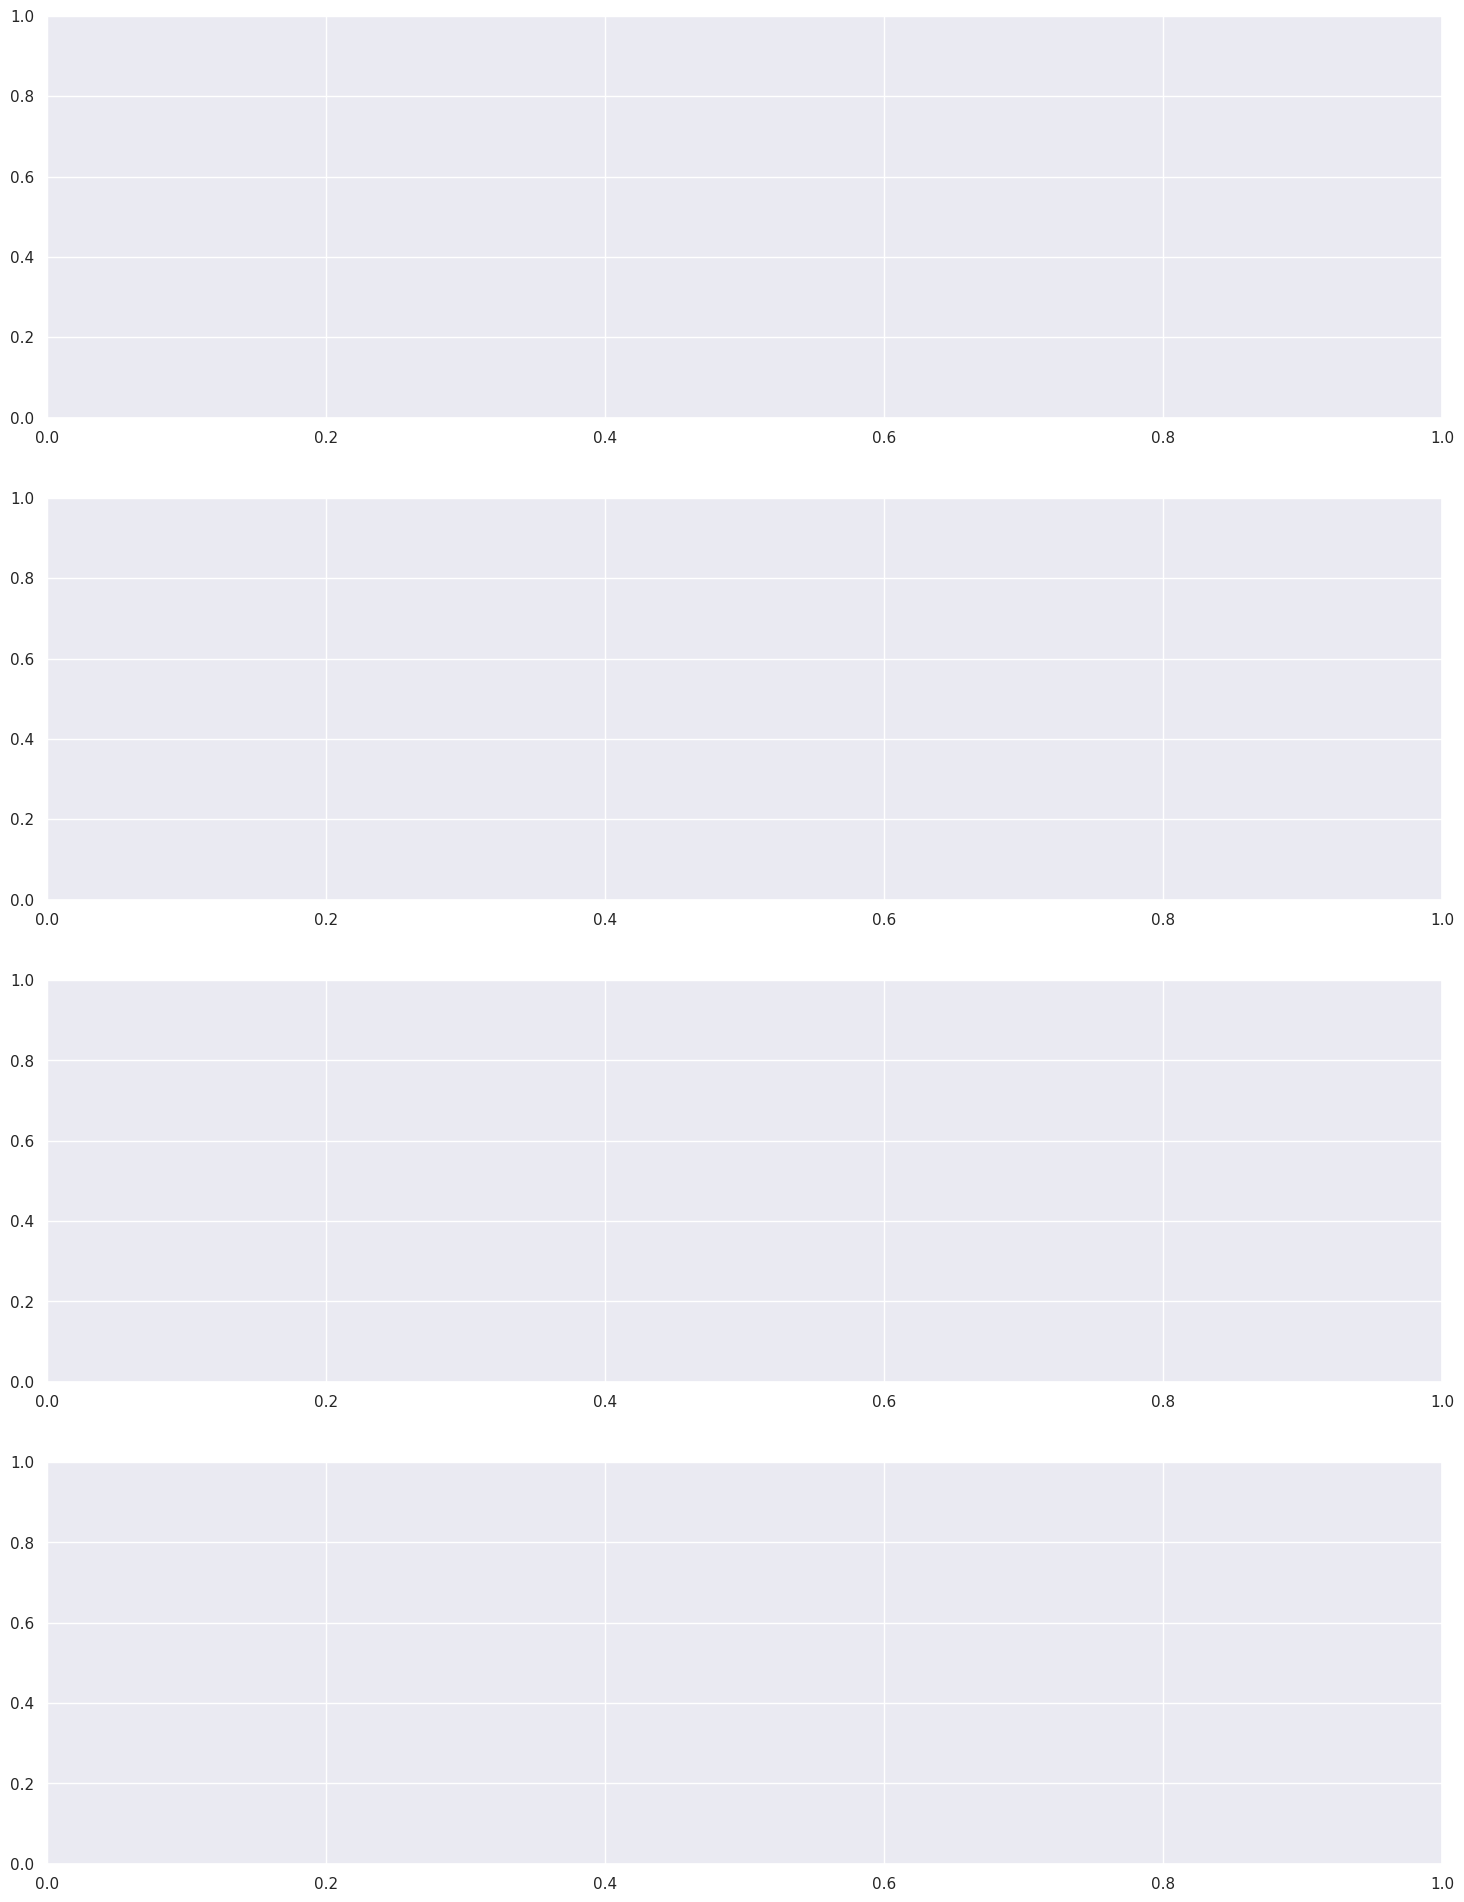

In [ ]:
f, axes = plt.subplots(4, 1, figsize=(18, 24))
count = 0
for var in al:
  sb.histplot(data = al[var],ax=count,kde = True)
  count += 1
